In [2]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4' 

from transformers import AutoTokenizer
import torch
import torch.nn as nn
from transformers import Trainer, TrainingArguments
import pandas as pd
import json
from bert_phrase_removal_head import BertForPhraseRelevance
from custom_dataset import PhraseRemovalDataset

import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import pickle
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support,accuracy_score, auc, average_precision_score, confusion_matrix, roc_curve, precision_recall_curve

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## HPC BERT train v1

In [2]:
with open('obl_train_v1_e20b16lr3e6w000001_cp1183.txt', 'rb') as handle: 
    data = handle.read() 

In [3]:
info = pickle.loads(data) 

In [4]:
recalls = info["recalls"]
precs = info["precs"]
predictions = info["predictions"]
test_labels = info["test_labels"]
predicted_labels = info["predicted_labels"]

In [7]:
predicted_labels.count(1)

52

In [8]:
predicted_labels.count(0)

948

In [9]:
prec, rec, fscore, supp = precision_recall_fscore_support(test_labels, predicted_labels)

In [10]:
print(f"precision:{prec}\nrecall:{rec}\n")

precision:[0.50632911 0.61538462]
recall:[0.96  0.064]



In [11]:
precision, recall, fscore, support = score(test_labels, predicted_labels)

print('precision: {}'.format(precision.round(3)))
print('recall: {}'.format(recall.round(3)))
print('fscore: {}'.format(fscore.round(3)))
print('support: {}'.format(support.round(3)))

precision = precision_score(test_labels, predicted_labels, pos_label=1, average='binary')
recall = recall_score(test_labels, predicted_labels, pos_label=1, average='binary')
print('precision: ',precision.round(3))
print('recall: ',recall.round(3))

precision: [0.506 0.615]
recall: [0.96  0.064]
fscore: [0.663 0.116]
support: [500 500]
precision:  0.615
recall:  0.064


In [12]:
# Compute global precision and recall
precision1, recall1, thresh1 = precision_recall_curve(test_labels, predictions, pos_label=1)#,drop_intermediate=True )

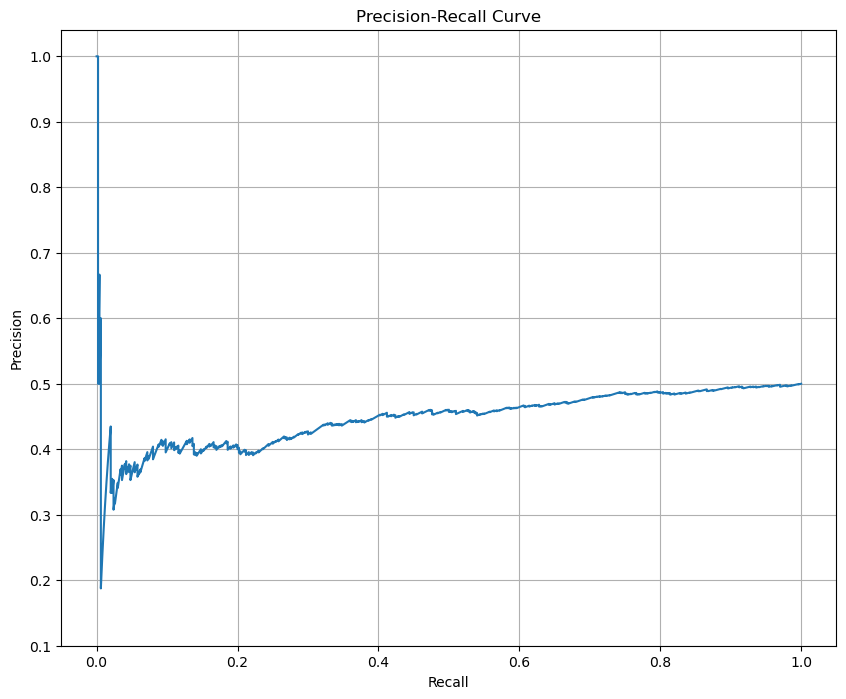

In [13]:
# Plot the precision-recall curve
plt.figure(figsize=(10, 8))
plt.plot(recall1, precision1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid(True)
plt.show()

In [14]:
# Compute global precision and recall
precision2, recall2, thresh2 = precision_recall_curve(test_labels, predicted_labels, pos_label=1)

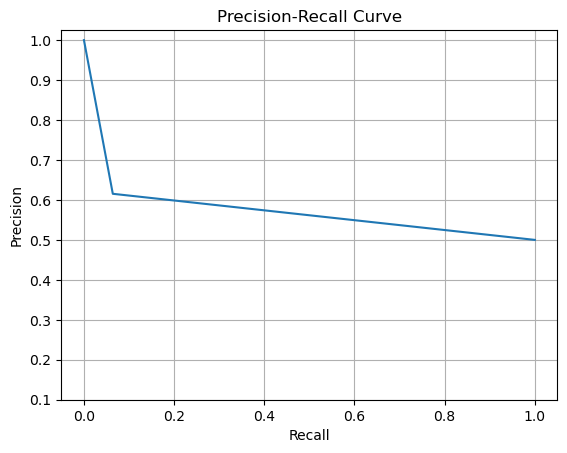

In [15]:
# Plot the precision-recall curve
plt.plot(recall2, precision2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid(True)
plt.show()

In [16]:
fpr, tpr, thresholds = roc_curve(test_labels, predictions, pos_label=1)

In [17]:
roc_auc = auc(fpr, tpr)

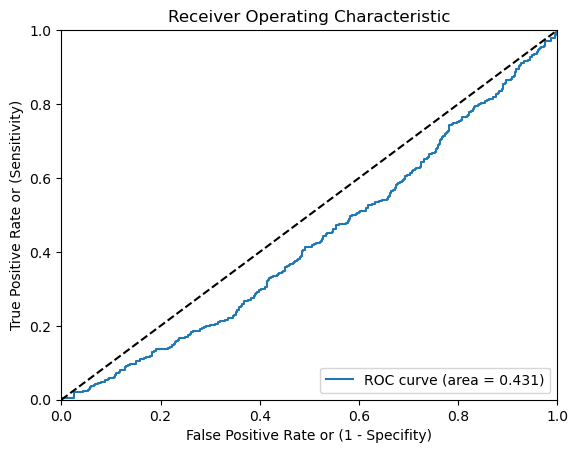

In [18]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [19]:
fpr2, tpr2, thresholds2 = roc_curve(test_labels, predicted_labels, pos_label=1)

In [20]:
roc_auc2 = auc(fpr2, tpr2)

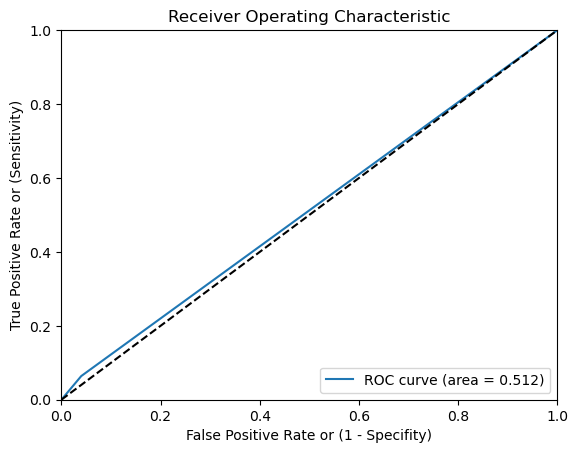

In [21]:
# Plot ROC curve
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.3f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")